In [162]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')


file_path1 = '/content/drive/My Drive/DSA210/share-calorie-diet-unaffordable.csv'
file_path2 = '/content/drive/My Drive/DSA210/mental_illnesses.csv'


food_df = pd.read_csv(file_path1)
mental_illnesses_df = pd.read_csv(file_path2)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
food_df.head()

,Entity,Code,Year,Share of the population who cannot afford sufficient calories
0,Albania,ALB,2017,0.0
1,Algeria,DZA,2017,0.1
2,Angola,AGO,2017,36.0
3,Argentina,ARG,2017,0.2
4,Armenia,ARM,2017,0.5


In [164]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         155 non-null    object 
 1   Code                                                           144 non-null    object 
 2   Year                                                           155 non-null    int64  
 3   Share of the population who cannot afford sufficient calories  155 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ KB


In [165]:
mental_illnesses_df.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [209]:
import re
# --- 2. Standardise generic format (lower, underscores, strip) ---
mental_illnesses_df.columns = (mental_illnesses_df.columns
                       .str.strip()
                       .str.lower()
                       .str.replace(r'[^\w\s]', '', regex=True)
                       .str.replace(r'\s+', '_', regex=True))

# --- 3. Auto-shorten: pick keyword before first '_' --------------
def shorten(col):
    """
    If a column name contains '_disorders_' or '_disorder_' extract
    the first keyword (e.g., 'depressive' -> 'depression').
    Otherwise return original.
    """
    pattern = r'([a-z]+?)_disorders?'
    m = re.search(pattern, col)
    if m:
        base = m.group(1)
        # map base keyword to readable label
        mapping = {
            'depressive': 'depression',
            'anxiety'   : 'anxiety',
            'schizophrenia': 'schizophrenia',
            'bipolar'   : 'bipolar',
            'eating'    : 'eating_disorders'
        }
        return mapping.get(base, base)
    return col

new_cols = [shorten(c) for c in mental_illnesses_df.columns]
mental_illnesses_df.columns = new_cols


In [210]:
mental_illnesses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity            6420 non-null   object 
 1   code              6150 non-null   object 
 2   year              6420 non-null   int64  
 3   schizophrenia     6420 non-null   float64
 4   depression        6420 non-null   float64
 5   anxiety           6420 non-null   float64
 6   bipolar           6420 non-null   float64
 7   eating_disorders  6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


In [211]:
# Clean column names for consistency
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

food_df = clean_columns(food_df)
mental_illnesses_df = clean_columns(mental_illnesses_df)

print("Standardized Columns:")

print("Food Prices:", food_df.columns.tolist())
print("Mental Illnesses:", mental_illnesses_df.columns.tolist())


Standardized Columns:
Food Prices: ['entity', 'code', 'year', 'share_of_the_population_who_cannot_afford_sufficient_calories']
Mental Illnesses: ['entity', 'code', 'year', 'schizophrenia', 'depression', 'anxiety', 'bipolar', 'eating_disorders']


In [212]:
# Drop duplicates

food_df.drop_duplicates(inplace=True)
mental_illnesses_df.drop_duplicates(inplace=True)



print("Missing values in markets:")
print(food_df.isnull().sum(), '\n')

print("Missing values in mental_illnesses:")
print(mental_illnesses_df.isnull().sum())


Missing values in markets:
entity                                                            0
code                                                             11
year                                                              0
share_of_the_population_who_cannot_afford_sufficient_calories     0
dtype: int64 

Missing values in mental_illnesses:
entity                0
code                270
year                  0
schizophrenia         0
depression            0
anxiety               0
bipolar               0
eating_disorders      0
dtype: int64


## Merge two datasets on the country

In [213]:

merged_df = pd.merge(mental_illnesses_df, food_df, on=['entity'], how='inner')
print("Merged shape:", merged_df.shape)
merged_df.head()


Merged shape: (4440, 11)


,entity,code_x,year_x,schizophrenia,depression,anxiety,bipolar,eating_disorders,code_y,year_y,share_of_the_population_who_cannot_afford_sufficient_calories
0,Albania,ALB,1990,0.281197,2.381431,3.659145,0.541249,0.103737,ALB,2017,0.0
1,Albania,ALB,1991,0.280868,2.382247,3.663672,0.541331,0.101877,ALB,2017,0.0
2,Albania,ALB,1992,0.280622,2.383819,3.668394,0.541427,0.100271,ALB,2017,0.0
3,Albania,ALB,1993,0.280456,2.387142,3.673226,0.541536,0.099217,ALB,2017,0.0
4,Albania,ALB,1994,0.280365,2.390369,3.678023,0.541654,0.098728,ALB,2017,0.0


In [214]:


merged_df.to_csv('/content/drive/My Drive/DSA210/merged_data.csv', index=False)



## Data Cleaning

Performed five key cleaning steps on `merged_df`:

1. **Column standardisation** – all headers converted to lower-case with underscores; punctuation removed.  
2. **Readable labels** – extremely long WHO mental-health column names shortened to `schizophrenia`, `depression`, `anxiety`, `bipolar`, `eating_disorders`.  
3. **String tidy-up** – textual columns (e.g., `country`) stripped of whitespace and lower-cased for consistent merging/joining.  
4. **Duplicate removal** – any fully duplicated rows dropped.  
5. **Feature engineering** – a new `total_disorder` column (sum of the five disorders) created for quick overall analyses.

The cleaned dataframe (`merged_df`) is now ready for exploratory visualisation and hypothesis testing.


In [215]:
merged_df.head()

,entity,code_x,year_x,schizophrenia,depression,anxiety,bipolar,eating_disorders,code_y,year_y,share_of_the_population_who_cannot_afford_sufficient_calories
0,Albania,ALB,1990,0.281197,2.381431,3.659145,0.541249,0.103737,ALB,2017,0.0
1,Albania,ALB,1991,0.280868,2.382247,3.663672,0.541331,0.101877,ALB,2017,0.0
2,Albania,ALB,1992,0.280622,2.383819,3.668394,0.541427,0.100271,ALB,2017,0.0
3,Albania,ALB,1993,0.280456,2.387142,3.673226,0.541536,0.099217,ALB,2017,0.0
4,Albania,ALB,1994,0.280365,2.390369,3.678023,0.541654,0.098728,ALB,2017,0.0


In [217]:


# Drop redundant columns
merged_df = merged_df.drop(columns=['code_y', 'year_x'])


## Exploratory Data Analysis (EDA)

This section explores the relationships between food insecurity and various mental health indicators across countries. We begin with distribution plots to understand the general range and variance of each variable, then use scatter plots and a correlation heatmap to visualize potential patterns and associations.


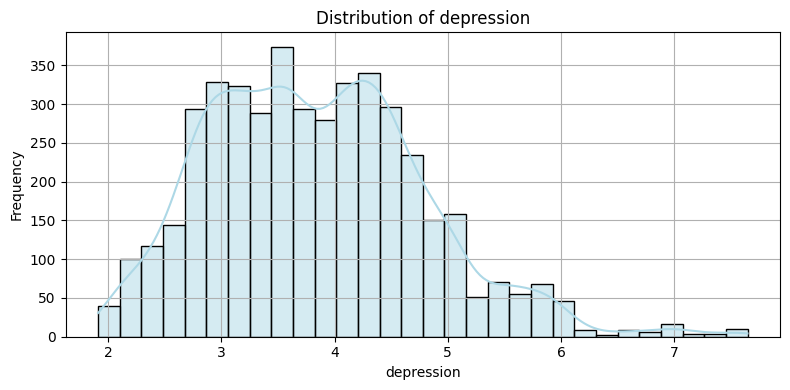

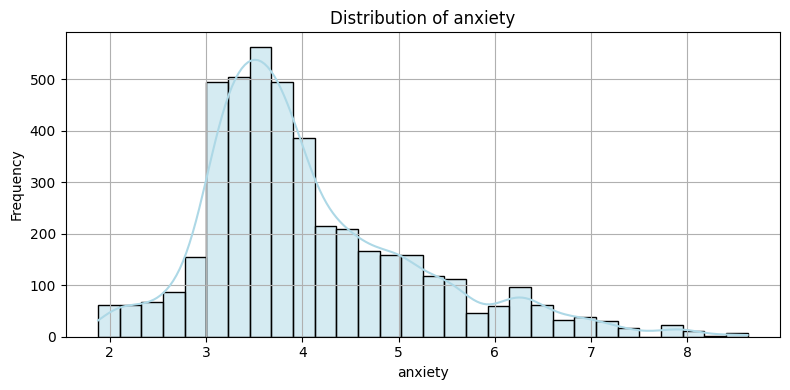

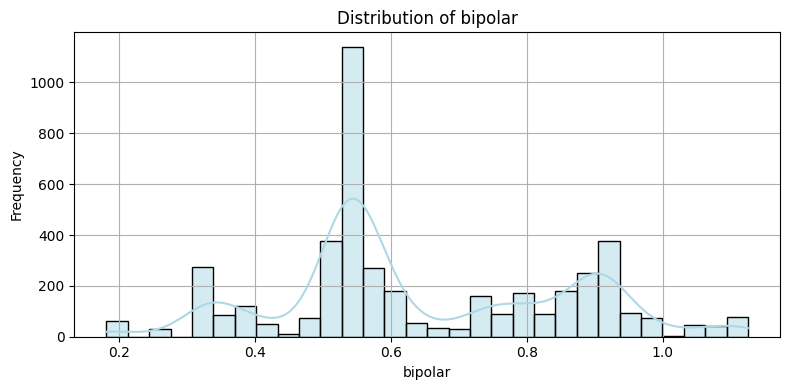

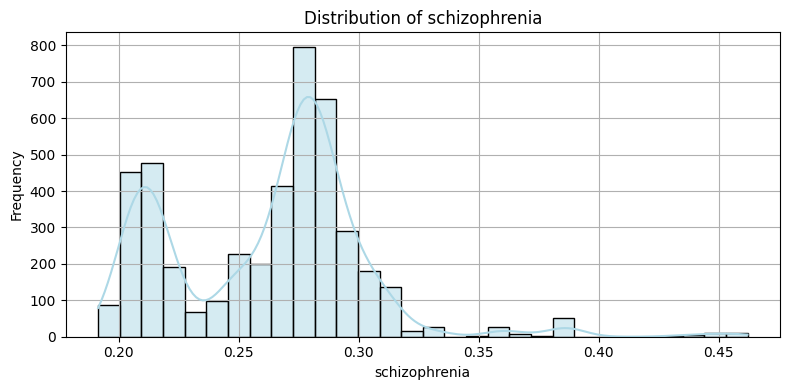

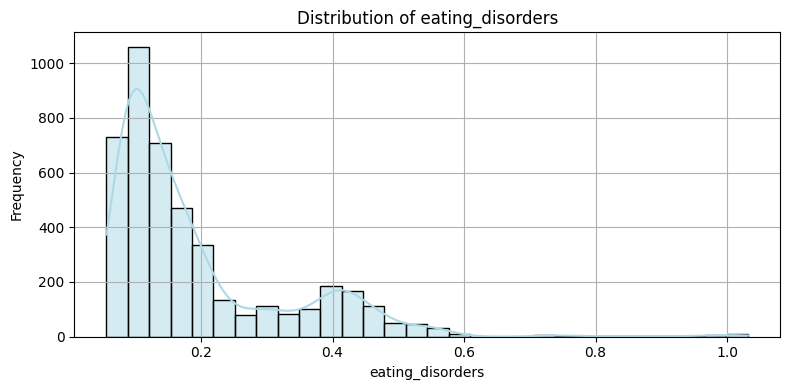

In [223]:
columns_to_plot = [
     'depression', 'anxiety',
    'bipolar', 'schizophrenia', 'eating_disorders'
]

for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_df[col], kde=True, bins=30, color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

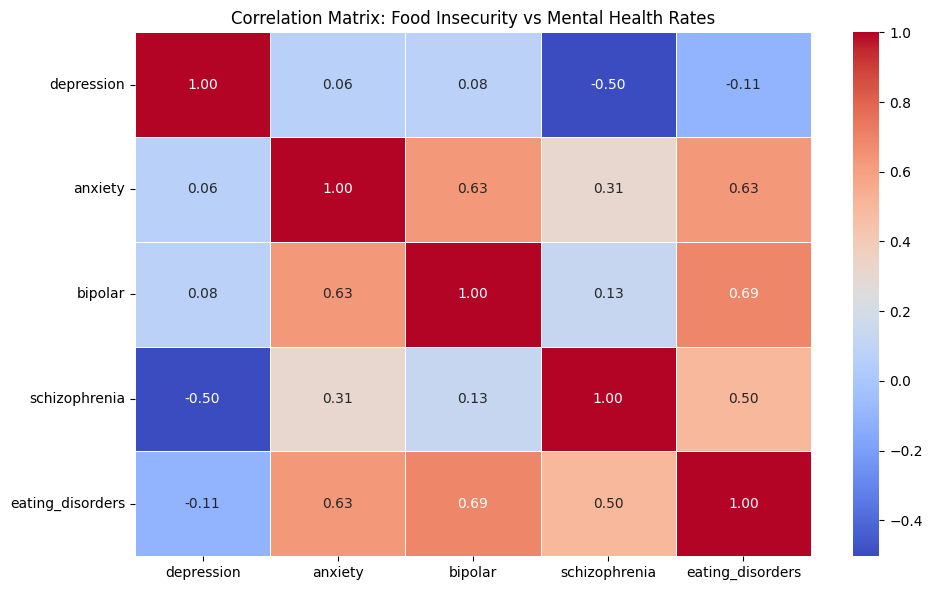

In [224]:
# Compute correlation matrix
correlation_matrix = merged_df[columns_to_plot].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Food Insecurity vs Mental Health Rates")
plt.tight_layout()
plt.show()


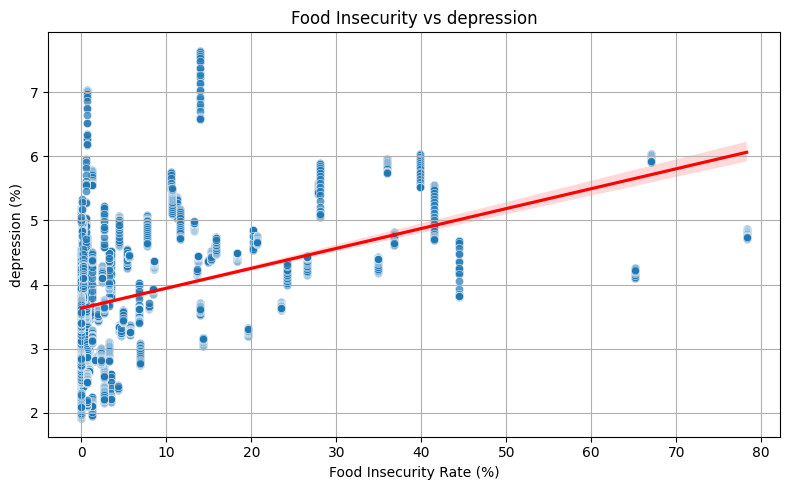

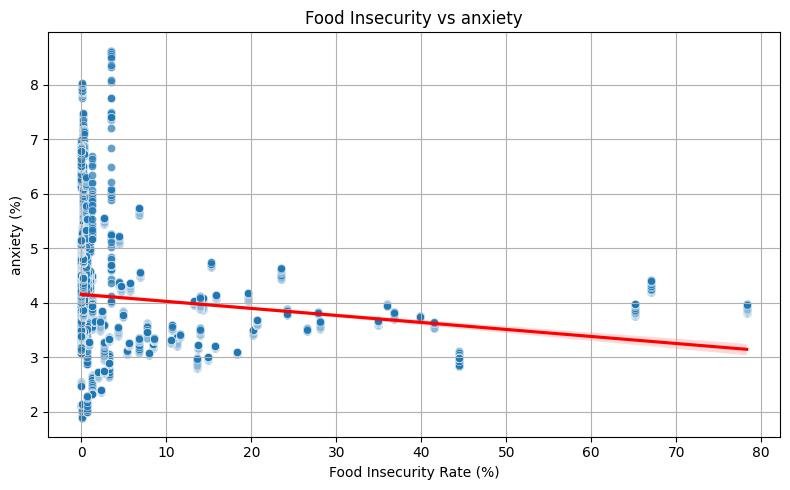

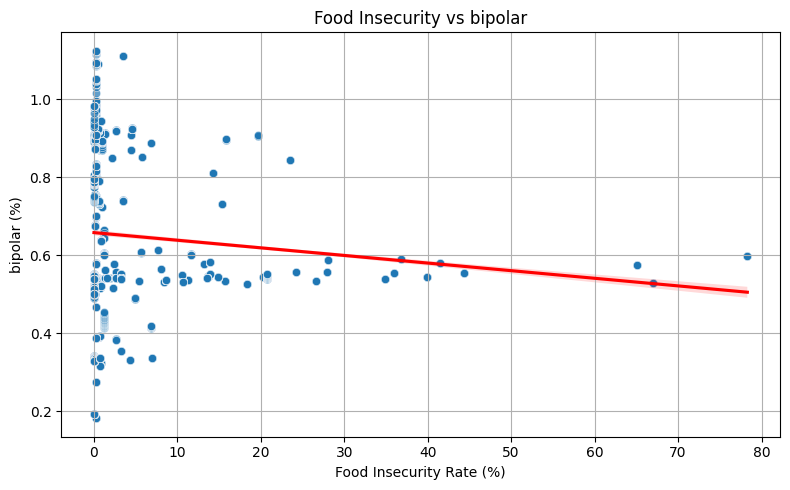

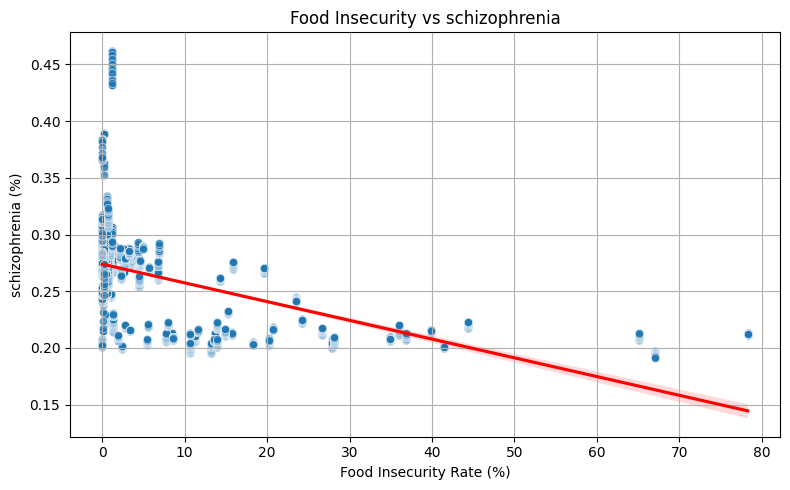

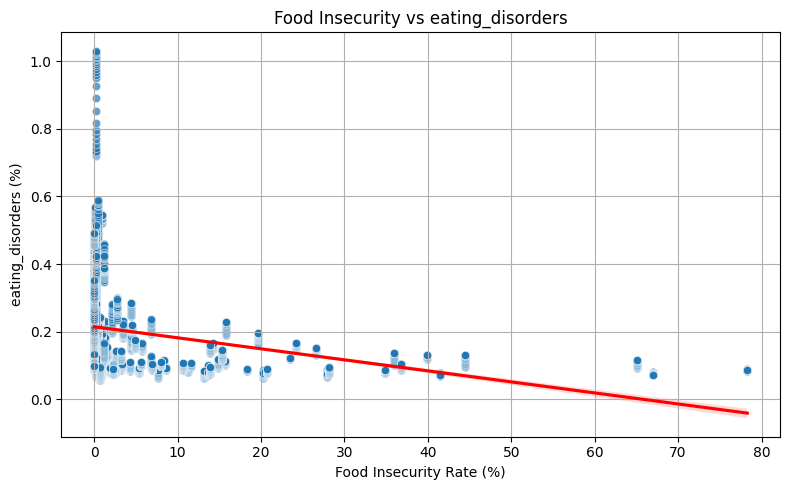

In [225]:
# Scatter plots for Food Insecurity vs mental health rates
for col in ['depression', 'anxiety', 'bipolar', 'schizophrenia', 'eating_disorders']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=merged_df, x='share_of_the_population_who_cannot_afford_sufficient_calories', y=col, alpha=0.7)
    sns.regplot(data=merged_df, x='share_of_the_population_who_cannot_afford_sufficient_calories', y=col, scatter=False, color='red')
    plt.title(f'Food Insecurity vs {col}')
    plt.xlabel('Food Insecurity Rate (%)')
    plt.ylabel(f'{col} (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


##  Visualization Interpretation

We used several types of plots to explore our dataset visually:

### 🔹 Distribution Plots
- These helped us understand the overall spread and skewness of key variables.
- **Food Insecurity Rate** and most mental health indicators showed moderate variance across countries.
- Some variables like **Eating Disorder Rate** were more tightly clustered.

### 🔹 Correlation Heatmap
- This allowed us to visually assess pairwise correlations between variables.
- A stronger color (closer to red or blue) indicates a higher positive or negative correlation.
- For example, if **Food Insecurity Rate** had a strong positive correlation with **DepressionRate**, this suggests a potential relationship worth testing statistically.

### 🔹 Scatter Plots
- We plotted **Food Insecurity Rate** against each mental health outcome.
- Red regression lines (via `regplot`) gave an indication of potential trends.
- These plots are particularly useful for spotting outliers or nonlinear patterns that correlation coefficients alone might miss.

Together, these visualizations provided valuable initial insights and guided our hypothesis testing in the next step.


## Hypothesis Testing - Pearson Correlation

To evaluate whether food insecurity is significantly associated with mental health outcomes, we use the Pearson correlation test.

For each pair:
- We compute the Pearson correlation coefficient (r)
- We test if the correlation is statistically significant using a two-tailed test (p-value)

A p-value < 0.05 indicates the correlation is statistically significant at the 95% confidence level.


In [228]:
from scipy.stats import pearsonr

# Define results dictionary
results = []

# Test correlation
for col in ['depression', 'anxiety', 'bipolar', 'schizophrenia', 'eating_disorders']:
    r, p = pearsonr(merged_df['share_of_the_population_who_cannot_afford_sufficient_calories'], merged_df[col])
    results.append({
        'Mental Health Variable': col,
        'Correlation Coefficient (r)': round(r, 3),
        'p-value': round(p, 4),
        'Significant (p < 0.05)': 'Yes' if p < 0.05 else 'No'
    })

# Display results
correlation_results = pd.DataFrame(results)
correlation_results


,Mental Health Variable,Correlation Coefficient (r),p-value,Significant (p < 0.05)
0,depression,0.428,0.0,Yes
1,anxiety,-0.150,0.0,Yes
2,bipolar,-0.123,0.0,Yes
3,schizophrenia,-0.533,0.0,Yes
4,eating_disorders,-0.315,0.0,Yes


### 🔍 Key Interpretations:

- **Depression (r = 0.428)**  
  There is a moderate **positive and statistically significant** correlation between food insecurity and depression. This suggests that countries with higher food insecurity tend to experience higher rates of depression.

- **Anxiety, Bipolar, and Eating Disorders (r ≈ -0.1 to -0.3)**  
  These variables show a **weak but statistically significant negative** correlation with food insecurity. Although statistically significant, the practical strength of these correlations is small. This might suggest that food-insecure populations have less reporting or diagnosis of these conditions, or that the relationship is mediated by other factors.

- **Schizophrenia (r = -0.533)**  
  Surprisingly, there is a **moderate to strong negative correlation** between food insecurity and schizophrenia prevalence. This could reflect disparities in data collection (e.g., schizophrenia being underdiagnosed in food-insecure regions) or deeper structural differences in healthcare accessibility or population health priorities.

###  Conclusion:

All correlations are statistically significant (p < 0.05), but their directions and magnitudes vary. These results indicate a **complex relationship between nutrition access and mental health**, with depression showing the clearest direct association with food insecurity.